In [18]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [19]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [20]:
model_CNN = tf.keras.Sequential()
model_CNN.add(tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(28, 28, 1)))
model_CNN.add(tf.keras.layers.MaxPooling2D((2,2)))
model_CNN.add(tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model_CNN.add(tf.keras.layers.MaxPooling2D((2,2)))
model_CNN.add(tf.keras.layers.Flatten())
model_CNN.add(tf.keras.layers.Dense(512, activation='relu'))
model_CNN.add(tf.keras.layers.Dense(10))

In [21]:
model_CNN.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_4 (Dense)             (None, 512)              

In [22]:
model_CNN.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [23]:
history = model_CNN.fit(x_train, y_train, epochs=20, validation_split=0.15)

Epoch 1/20
1594/1594 [==============================] - 11s 7ms/step - loss: 0.4051 - accuracy: 0.9486 - val_loss: 0.0671 - val_accuracy: 0.9798
Epoch 2/20
1594/1594 [==============================] - 10s 6ms/step - loss: 0.0556 - accuracy: 0.9825 - val_loss: 0.0803 - val_accuracy: 0.9784
Epoch 3/20
1594/1594 [==============================] - 10s 6ms/step - loss: 0.0433 - accuracy: 0.9865 - val_loss: 0.0643 - val_accuracy: 0.9828
Epoch 4/20
1594/1594 [==============================] - 10s 6ms/step - loss: 0.0407 - accuracy: 0.9876 - val_loss: 0.0811 - val_accuracy: 0.9798
Epoch 5/20
1594/1594 [==============================] - 10s 6ms/step - loss: 0.0339 - accuracy: 0.9893 - val_loss: 0.0768 - val_accuracy: 0.9807
Epoch 6/20
1594/1594 [==============================] - 10s 6ms/step - loss: 0.0296 - accuracy: 0.9908 - val_loss: 0.0653 - val_accuracy: 0.9862
Epoch 7/20
1594/1594 [==============================] - 10s 6ms/step - loss: 0.0270 - accuracy: 0.9922 - val_loss: 0.0659 - val_ac

In [24]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

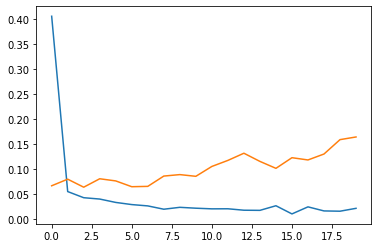

In [25]:
plt.plot(loss)
plt.plot(val_loss)

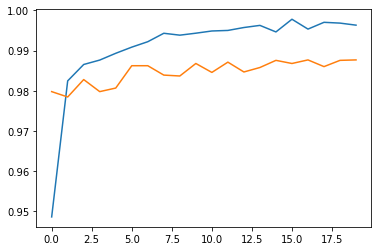

In [26]:
plt.plot(accuracy)
plt.plot(val_accuracy)

In [17]:
model_CNN.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0970 - accuracy: 0.9843


[0.09702088683843613, 0.9843000173568726]